# Combination of the W boson polarization measurements in top quark decays using ATLAS and CMS data at $\sqrt{s} = 8$ TeV

## [JHEP 08 (2020) 051][1]

This notebook attempts to reproduce the results of [JHEP 08 (2020) 051][1], in which ATLAS and CMS measurements of the W boson polarisation in top quark events are combined. 

[1]:  https://link.springer.com/article/10.1007/JHEP08(2020)051

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from blue import Blue

First, we load the data, that are stored in a csv file that contains all the measurments and correlations. The ordering of the measurements is the same as in Table 5 of the paper. This is important for when we define the correlation matrix. Columns of correlations start with "Rho" so we separate those out into a separate dataframe. In case the systematics are given as < 0.001 they are set to 0. The same is true for any entries marked as *n.a.*

In [3]:
df = pd.read_csv("data/JHEP_08_2020_51.csv", index_col="Exp")
correlation_columns = df.columns.str.startswith("Rho")
# Correlation columns start with "Rho", the "Value" row isn't needed for correlations
corrs = df[df.columns[correlation_columns]].drop("Value")
# The remaining columns are our measurements and uncertainties
df = df[df.columns[~correlation_columns]]
# View the dataframe
df

,ATLAS F0,CMS ejets F0,CMS mujets F0,CMS single top F0,ATLAS FL,CMS ejets FL,CMS mujets FL,CMS single top FL
Exp,,,,,,,,
Value,0.709,0.705,0.685,0.720,0.299,0.304,0.328,0.298
Stat+bkg,0.012,0.028,0.016,0.041,0.008,0.011,0.010,0.031
Size of simulated samples,0.009,0.002,0.002,0.020,0.006,0.001,0.001,0.012
JES,0.005,0.004,0.005,0.004,0.003,0.003,0.003,0.004
JER,0.006,0.001,0.004,0.001,0.003,0.002,0.003,0.001
JVF,0.003,0.000,0.000,0.000,0.002,0.000,0.000,0.000
Jet reconstruction efficiency,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Lepton efficiency,0.004,0.001,0.001,0.000,0.002,0.002,0.001,0.000
B tagging,0.002,0.001,0.001,0.006,0.001,0.000,0.000,0.006


One can also check the correlations are the same as defined in Tables 2, 3, 4 and 6 of the paper.

In [4]:
corrs

,Rho ATLAS F0 FL,Rho CMS ejets F0 FL,Rho CMS mujets F0 FL,Rho CMS single top F0 FL,Rho LHC,Rho CMS e/mu jets,Rho CMS ljets/st
Exp,,,,,,,
Stat+bkg,-1.00,-0.87,-0.88,-0.90,0.0,0,0
Size of simulated samples,-1.00,-0.95,-0.96,-0.96,0.0,0,0
JES,-0.94,-1.00,-1.00,-1.00,0.2,1,1
JER,-0.92,-1.00,-1.00,-1.00,0.0,1,1
JVF,-0.99,0.00,0.00,0.00,0.0,0,0
Jet reconstruction efficiency,-1.00,0.00,0.00,0.00,0.0,0,0
Lepton efficiency,-0.99,-1.00,-1.00,-1.00,0.0,0,0
B tagging,-0.84,-1.00,-1.00,-1.00,0.0,1,1
Pileup,0.00,-1.00,-1.00,-1.00,0.0,1,1


The correlations in this combination are quite complicated, so we make a function that constructs a correlation matrix per uncertainty. We do this explicitly writing out the "upper triangle" elements of the matrix defined in Table 5 (including those not shown).

In [5]:
def make_correlation_matrix(corrs):
    """Make a correlation matrix for a single uncertainty"""    
    rho_lhc = corrs["Rho LHC"]
    rho_atlas = corrs["Rho ATLAS F0 FL"]
    rho_cms_ejets = corrs["Rho CMS ejets F0 FL"]
    rho_cms_mujets = corrs["Rho CMS mujets F0 FL"]
    rho_cms_emu = corrs["Rho CMS e/mu jets"]
    rho_cms_st = corrs["Rho CMS single top F0 FL"]
    rho_cms_ljets_st = corrs["Rho CMS ljets/st"]
    return (
        [rho_lhc, rho_lhc, rho_lhc, rho_atlas, -rho_lhc, -rho_lhc, -rho_lhc,  # 7
         rho_cms_emu, rho_cms_ljets_st, -rho_lhc, rho_cms_ejets, -rho_cms_emu, -rho_cms_ljets_st,  # 6
         rho_cms_ljets_st, -rho_lhc, -rho_cms_emu, rho_cms_mujets, -rho_cms_ljets_st,  # 5
         -rho_lhc, -rho_cms_ljets_st, -rho_cms_ljets_st, rho_cms_st,  # 4
         rho_lhc, rho_lhc, rho_lhc,  # 3
         rho_cms_emu, rho_cms_ljets_st,  # 2
         rho_cms_ljets_st  # 1
        ]  
    )

def make_correlation_matrices(corrs):
    """A helper to shorten the dictionary comprehension"""
    return {key: make_correlation_matrix(corrs.loc[key]) for key in corrs.index}

This paper combines two variables ($F_0$ and $F_L$) simultaneously, so make a dictionary defining which measurements correspond to which observables.

In [6]:
f0_cols = df.columns.str.endswith("F0")
observables = {
    "F0": list(df.columns[f0_cols]),
    "FL": list(df.columns[~f0_cols])
}

We finally have everything we need to do the combination. Note that we need to transpose the dataframe so that the rows are the individual measurements.

In [7]:
blue = Blue(df.T, make_correlation_matrices(corrs), observables)

Straight away we can look at the combined results for $F_0$ and $F_L$:

In [8]:
blue.combined_result

{'F0': 0.6939463140242952, 'FL': 0.3142451582925914}

which are ever so slightly different from the results in the paper. This could be just because we don't have the exact numbers used in the combination (or we've made a mistake in the data entry!). The correlation between the two observables is however the same as what is quoted in the paper (-0.85):

In [9]:
blue.observable_correlations.round(2)

array([[ 1.  , -0.85],
       [-0.85,  1.  ]])

$F_\mathrm{R} = 1 - F_0 - F_\mathrm{L}$ so we can compute that by subtracting the two combined results from 1, giving a value consistent with that quoted in the paper (-0.008)

In [10]:
1 - np.array(list(blue.combined_result.values())).sum()

-0.00819147231688655

The breakdown of uncertainties is given in Table 7 of the paper

In [11]:
uncerts = pd.DataFrame(blue.combined_uncertainties, index=["F0", "FL"])
uncerts.T.round(3)

,F0,FL
Stat+bkg,0.009,0.006
Size of simulated samples,0.005,0.003
JES,0.004,0.002
JER,0.004,0.003
JVF,0.001,0.001
Jet reconstruction efficiency,0.000,0.000
Lepton efficiency,0.002,0.001
B tagging,0.001,0.001
Pileup,0.000,0.000
Top quark mass,0.003,0.004


We see some small differences here. Again, these are possibly for the same reasons mentioned above. Perhaps a little strangely, the paper doesn't include the uncertainties on $F_\mathrm{R}$, but we can compute those knowing the correlation.

In [12]:
uncerts_fr = pd.Series(np.sqrt((uncerts ** 2).sum() + 2 * np.prod(uncerts) * blue.observable_correlations[0, 1]), name="FR")
uncerts.append(uncerts_fr).T.round(3)

,F0,FL,FR
Stat+bkg,0.009,0.006,0.005
Size of simulated samples,0.005,0.003,0.003
JES,0.004,0.002,0.002
JER,0.004,0.003,0.002
JVF,0.001,0.001,0.001
Jet reconstruction efficiency,0.000,0.000,0.000
Lepton efficiency,0.002,0.001,0.001
B tagging,0.001,0.001,0.001
Pileup,0.000,0.000,0.000
Top quark mass,0.003,0.004,0.002


We can get the $\chi^2$ and NDF with

In [13]:
blue.chi2_ndf

(4.128760329918598, 6)

Which is a little different from what is in the paper. As is the $p$-value

In [14]:
from scipy.stats import chi2
chi2.sf(*_)

0.6592565225007903

Although it isn't a so far away. We can get the total correlations between measurments and make a plot similar to Figure 1 of the paper.

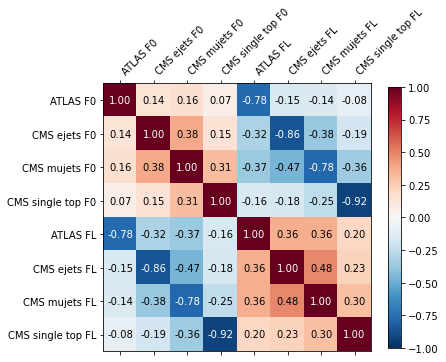

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
mat = ax.matshow(blue.total_correlations, cmap="RdBu_r", vmin=-1, vmax=1)
ax.set_xticks(range(8))
ax.set_xticklabels(list(df.columns), rotation=45, ha="left")
ax.set_yticks(range(8))
ax.set_yticklabels(list(df.columns))
from itertools import product
for (i, j), val in zip(product(range(8), range(8)), blue.total_correlations.ravel()):
    ax.text(i, j, f"{val:.2f}", ha="center", va="center", color="w" if abs(val) > 0.7 else "k")
fig.colorbar(mat, shrink=0.8);

Finally, we can check the blue weights. A table of the weights is included in the [Aux Material][2] of the paper, but not its main body. They are qualitively similar, but not exactly the same, suggesting perhaps something missing in our input data.

[2]: https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/TOPQ-2018-02/

In [16]:
pd.DataFrame(blue.weights, index=df.columns, columns=["F0", "FL"]).sort_index()

,F0,FL
ATLAS F0,0.775516,-0.287602
ATLAS FL,0.427228,0.062732
CMS ejets F0,0.020574,0.130549
CMS ejets FL,-0.096854,0.305204
CMS mujets F0,0.054727,0.182870
CMS mujets FL,-0.504835,0.651543
CMS single top F0,0.149182,-0.025817
CMS single top FL,0.174460,-0.019479
